# DataCamp Certification Case Study

### Project Brief

You have been hired as a data scientist at Discount Motors, a used car dealership in the UK. The dealership is expanding and has hired a large number of junior salespeople. Although promising, these junior employees have difficulties pricing used cars that arrive at the dealership. Sales have declined 18% in recent months, and management would like your help designing a tool to assist these junior employees.

To start with, they would like you to work with the Toyota specialist to test your idea(s). They have collected some data from other retailers on the price that a range of Toyota cars were listed at. It is known that cars that are more than £1500 above the estimated price will not sell. The sales team wants to know whether you can make predictions within this range.

You will need to present your findings in two formats:
- You must submit a written report summarising your analysis to your manager. As a data science manager, your manager has a strong technical background and wants to understand what you have done and why. 
- You will then need to share your findings with the head of sales in a 10 minute presentation. The head of sales has no data science background but is familiar with basic data related terminology. 

The data you will use for this analysis can be accessed here: `"data/toyota.csv"`

Analyisis Plan:
-
This project is focused on finding the best model to predict the price of different types of cars. In order to find it we will analyse pricing data of some Toyota cars with different caracteristics, such as, model, year of manufacturing, mileage, etc. Since we have a labeled dataset we can approach this as a supervised learning problem. 

First we are going to check the data for missing values and possible errors, next we will perform some exploratory data analysis to get a better understanding of our data. 

We want to select a model to predict the price of the car, which is a continuous variable, therefore we are going to try several regression models, such as linear regression, random forest regression, gradient boosting regression and knn regression. We first perform some feature selection to get the best features for each model, and then some hyperparameter tuning to select the best hyperparameters. Finally, we select the model using de mean squared error (mse) criterion, choosing the model with the smallest mse.

Data load:
-

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFECV

In [ ]:
df = pd.read_csv('data/toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [ ]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   float64
 2   price         6738 non-null   float64
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   float64
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   float64
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(6), object(3)
memory usage: 473.9+ KB
None
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


- Handling missing values: it appears there are no missin values in this data frame.

Checking for possible errors: 
- In the tables below we se that all values are positive as expected, and that every variable seem to present values in a reasonable range. Mpg appears to have some extreme values but I decided not to delete them because they are really few and it could be possible for the variable to present those values.

- Checking the descriptive table of the categorical variables we see that all the categories shown match with the variable description, so we assume there are no errors in them.

In [ ]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [ ]:
df.describe(include='O')

,model,transmission,fuelType
count,6738,6738,6738
unique,18,4,4
top,Yaris,Manual,Petrol
freq,2122,3826,4087


Exploratory Data Analysis
-
- get a better understanding of data
- identify data paterns

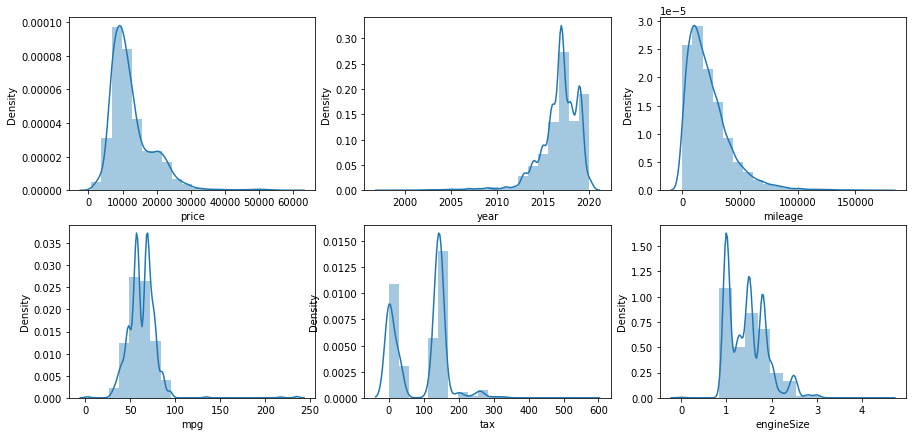

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [ ]:
# Checking numerical variables distributions
fig, ax = plt.subplots(2, 3, figsize=(15,7))
sns.distplot(df.price, bins=20, hist_kws={'alpha': 0.4}, ax=ax[0,0])
sns.distplot(df.year, bins=20, hist_kws={'alpha': 0.4}, ax=ax[0,1])
sns.distplot(df.mileage, bins=20, hist_kws={'alpha': 0.4}, ax=ax[0,2])
sns.distplot(df.mpg, bins=20, hist_kws={'alpha': 0.4}, ax=ax[1,0])
sns.distplot(df.tax, bins=20, hist_kws={'alpha': 0.4}, ax=ax[1,1])
sns.distplot(df.engineSize, bins=16, hist_kws={'alpha': 0.4}, ax=ax[1,2])
plt.show()

df.describe()

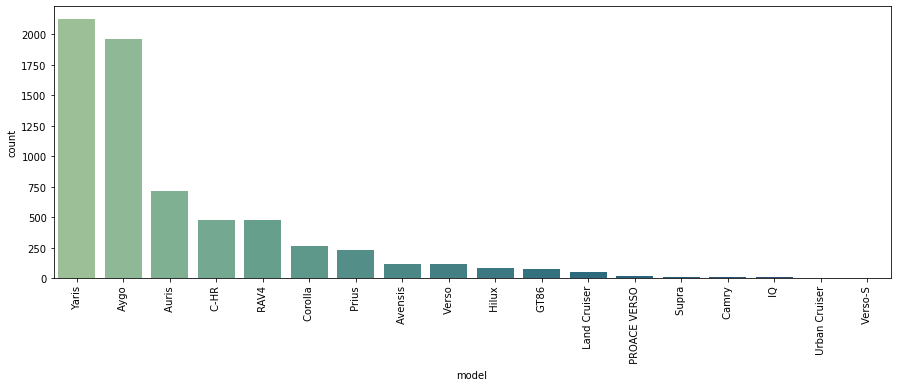

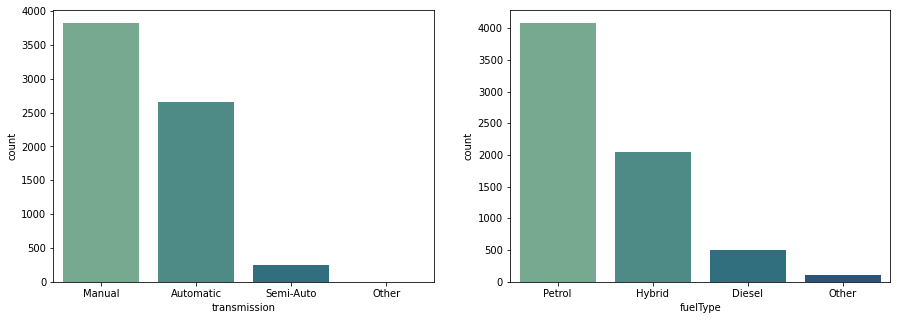

,model,transmission,fuelType
count,6738,6738,6738
unique,18,4,4
top,Yaris,Manual,Petrol
freq,2122,3826,4087


In [ ]:
# Analyzing categorical variables
plt.subplots(1, 1, figsize= (15,5))
sns.countplot(df.model, order=df.model.value_counts().index, palette='crest')
plt.xticks(rotation = 90)
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(df.transmission, order=df.transmission.value_counts().index, ax=ax[0], palette='crest')
sns.countplot(df.fuelType, order=df.fuelType.value_counts().index, ax=ax[1], palette='crest')
plt.show()

df.describe(include='O')

The most popular models in this dataset are Yaris and Aygo, while the least popular models are Supra, Camry, IQ, Urban Cruiser and Verso-S.

We can also see that the most common transmission type is Manual, followed by Automatic, and that most cars use petrol or are hybrid.

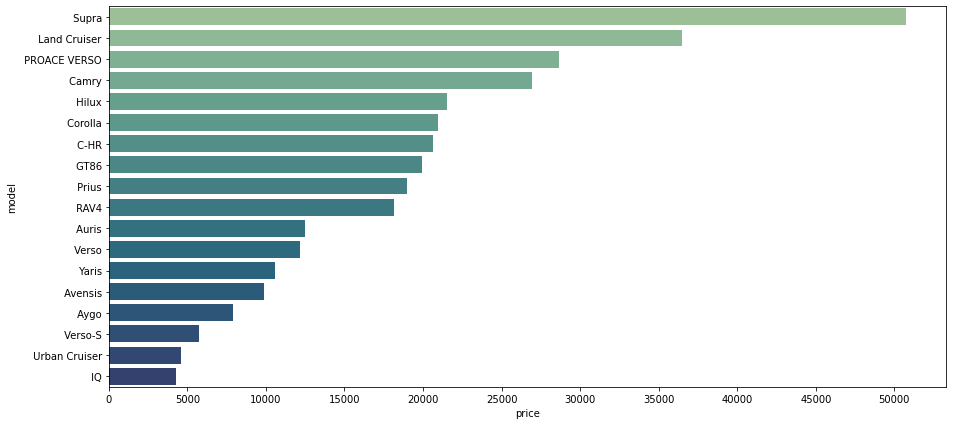

In [ ]:
# Average price per model
tmp = df.groupby('model', as_index=False)[['price']].mean().sort_values('price', ascending=False)
plt.subplots(1,1,figsize=(15,7))
sns.barplot(data=tmp, x='price', y='model', palette='crest')
plt.xticks(np.arange(0,50001,5000))
plt.show()

Analyzing the average price per model we find that the most expensive one is the Supra, with an average price above $50000. On the pricier side we also find the Land Cruiser, the Proace Verso and the Camry.

On the other side we have the IQ, the Urban Cruiser and the Verso-S, which are the cheapest models, all with an average price near $5000. It is worth noting that all of models are also the least sold ones.


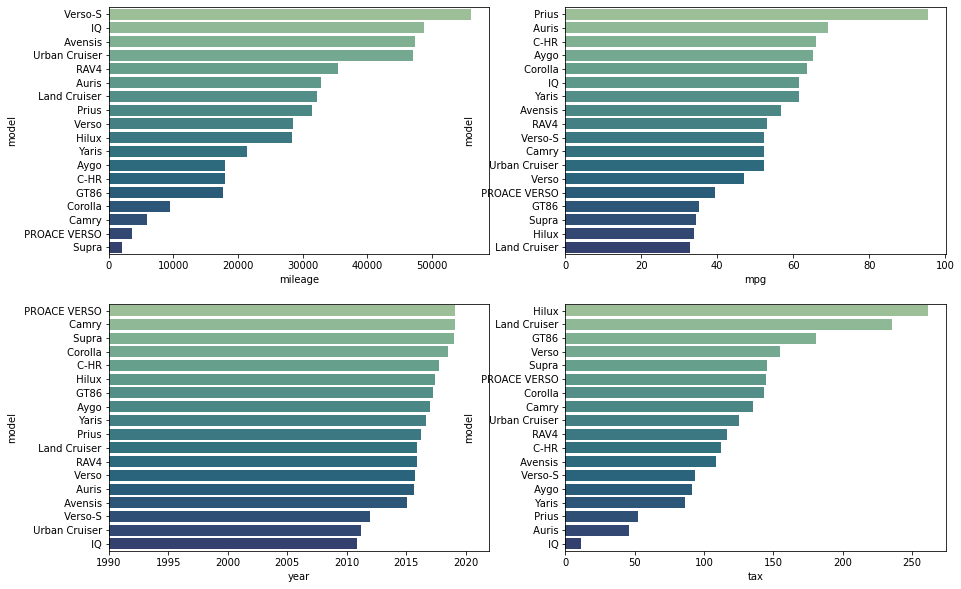

In [ ]:
# General analysis per model
tmp = df.groupby('model', as_index=False)[['mileage']].mean().sort_values('mileage', ascending=False)
tmp1 = df.groupby('model', as_index=False)[['mpg']].mean().sort_values('mpg', ascending=False)
tmp2 = df.groupby('model', as_index=False)[['year']].mean().sort_values('year', ascending=False)
tmp3 = df.groupby('model', as_index=False)[['tax']].mean().sort_values('tax', ascending=False)

fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.barplot(data=tmp, x='mileage', y='model', ax=ax[0,0], palette='crest')
sns.barplot(data=tmp1, x='mpg', y='model', ax=ax[0,1], palette='crest')
sns.barplot(data=tmp2, x='year', y='model', ax=ax[1,0], palette='crest')
sns.barplot(data=tmp3, x='tax', y='model', ax=ax[1,1], palette='crest')
ax.flat[2].set_xlim(1990, 2022)
plt.show()

Comparing other features between models we note that 
- average mileage varies over a wide range of values, with the Verso-S having more than 50000 miles and the Supra and Proace Verso having less than 5000 miles.
- the Prius shows the highest mpg on average, and the Land Cruiser shows the lowest.
- the average year of manufacture varies along the car models, with the oldest being IQ, Urban Cruiser and Verso-S, and the newest Proace Verso, Camry and Supra.
- Hilux and Land Cruiser are the most taxed models, while the IQ is almost excent, presenting an average tax close to zero.

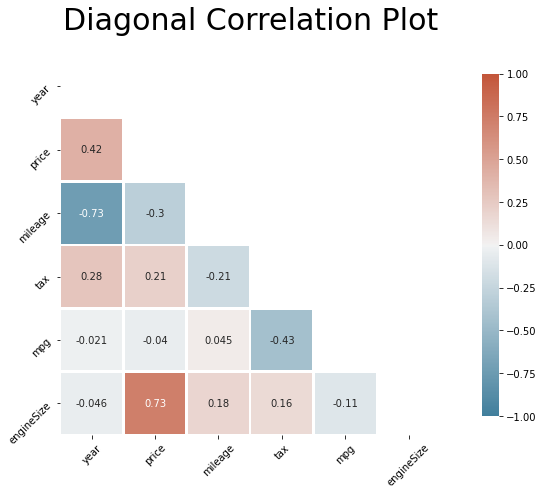

In [ ]:
# Checking correlations

# Compute the correlation matrix
corr = df.corr(method = 'pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 7))                    # Set figure size

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask 
sns.heatmap(corr, 
            mask = mask, 
            cmap = cmap, 
            vmax = 1,                                      # Set scale min value
            vmin = -1,                                     # Set scale min value
            center = 0,                                    # Set scale min value
            square = True,                                 # Ensure perfect squares
            linewidths = 1.5,                              # Set linewidth between squares
            cbar_kws = {"shrink": .9},                     # Set size of color bar
            annot = True                                   # Include values within squares
           );

plt.xticks(rotation=45)                                    # Rotate x labels
plt.yticks(rotation=45)                                    # Rotate y labels
# plt.xlabel('X Axis Title', size=20)                      # Set x axis title
# plt.ylabel('Y Axis Title', size=20)                      # Set y axis title
plt.title('Diagonal Correlation Plot', size=30, y=1.05);   # Set plot title and position

Observing the correlations matrix we can find:
- high positive correlation (corr>0.5) between price and year, and between price and engine size
- moderate positive correlation (0.25<corr<0.5) between tax and year
- moderate negative correlation (-0.5<corr<-0.25) between mileage and year, and between tax and mpg


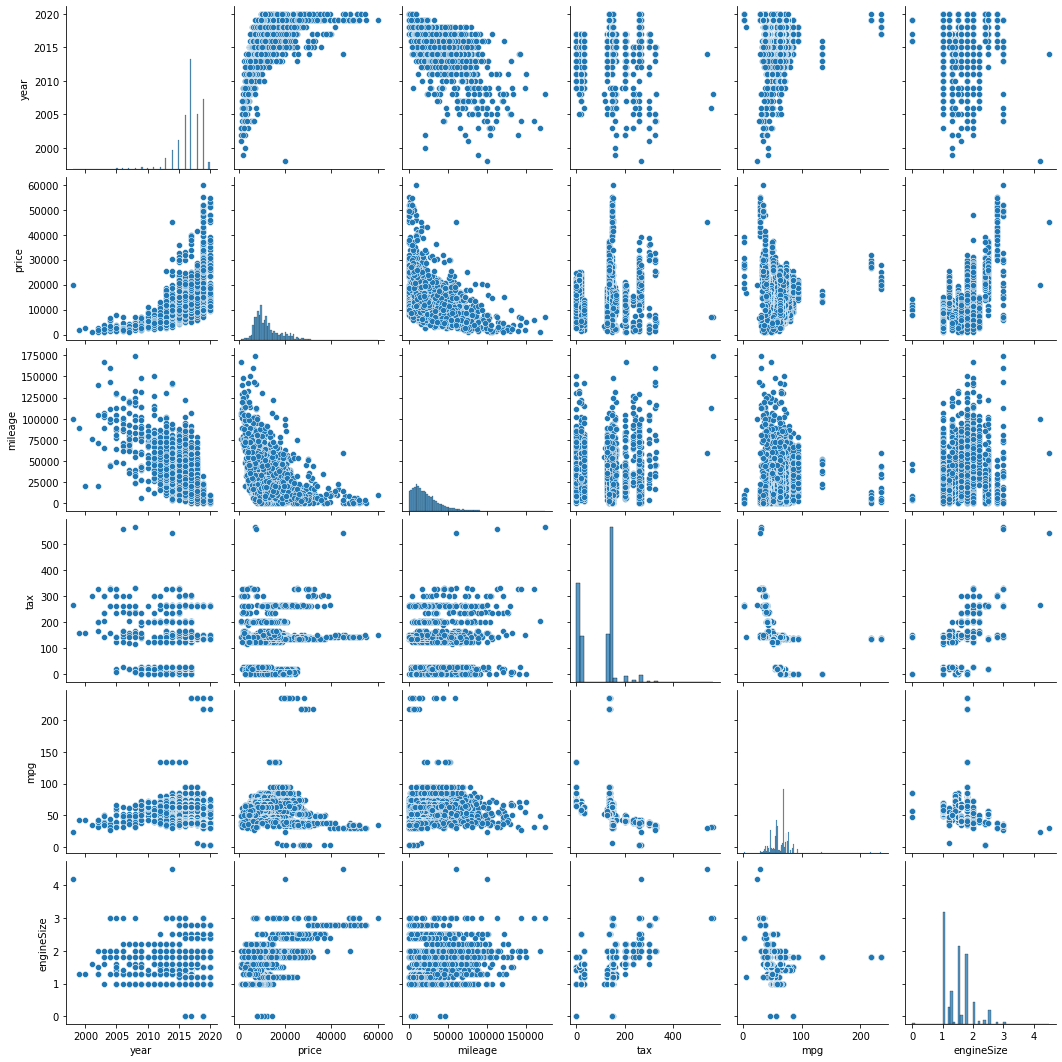

In [ ]:
sns.pairplot(df, diag_kind='hist')
plt.show()

Data Preprocessing:
-
Here we are going to log transform our numeric data, create dummies from categorical variables, get X and y, split our sample into train and test samples, and standarize our features.

In [ ]:
# Create X and y
y = df['price']
X = df.loc[:, df.columns != 'price']

# Apply log(x+1) to numerical variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for c in [c for c in X.columns if df[c].dtype in numerics]:
    df[c] = np.log(df[c]+1)

# Get dummies from categorical variable
X = pd.get_dummies(X, columns=['transmission', 'fuelType', 'model'], drop_first=True)

# Split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

# Standarize the data
scaler = StandardScaler()
scaler.fit(X_train)
scale_X_train = scaler.transform(X_train)
scale_X_test = scaler.transform(X_test)

# Save as DataFrame
X_train_scaled = pd.DataFrame(scale_X_train, index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scale_X_test, index=X_test.index, columns=X_test.columns)


Feature Selection:
-
We try to get the best features for each model, therefore we perform recursive feature elimination with cross validation in each model, starting from a model using all the variables. The criterion used te select the best number of features is the highest negative mean squared error.

In [ ]:
# Defining a function to perform feature selection

model_caracteristics = list()
features = list()
def cv_rfe( model, clf, X, y, X_test, y_test , min_fea = 1) :
    """ Takes a regression model and performs a RFECV to get the optimal number of features.
    Returns one dictionary with model caracteristics and another one with the selected features. 

    Args:
        model (str): [description]
        clf (Regressor): must have feature_importance_
        X : Train data set 
        y : Train target 
        X_test : Test data set 
        y_test : Test target
        min_fea (int, optional): Min features tested by the model, Defaults to 1.

    Returns:
        [type]: [description]
    """
    np.random.seed(0)
    min_features_to_select = min_fea 
    rfecv = RFECV( estimator = clf,
                 step = 1, 
                 min_features_to_select = min_features_to_select, 
                 cv = KFold(5 ,shuffle = True, random_state = 0),
                 scoring = 'neg_mean_squared_error')
    
    rfecv.fit(X,y)
    
     
    # Data it needs to return 
    
    score = rfecv.grid_scores_.max()
    optimal = rfecv.n_features_
    features = rfecv.support_
    test_score = rfecv.score(X_test, y_test)
    
    # Plotting the result
    
    plt.figure(figsize =(8,8))
    plt.xlabel('Number of selected features')
    plt.ylabel('MSE')
    plt.plot(range(min_features_to_select , len(rfecv.grid_scores_) + min_features_to_select),
             rfecv.grid_scores_ , label = 'Test_score')
    plt.annotate(f'Optimal number of features :{optimal} \n MSE : {score}',
                 xy=(optimal, score),
                 fontsize = 12,
                 arrowprops=dict(facecolor ='red',
                                shrink=0.5))
    plt.show()
   
    print('{0} can explain {1:.1%} of the variance of the test set'.format(model, test_score))
        
    
    return { 'Model' :model, 
            'MSE' : score,
            'n_features': optimal}, \
           {'Model' : model, 
           'Feature' : features}



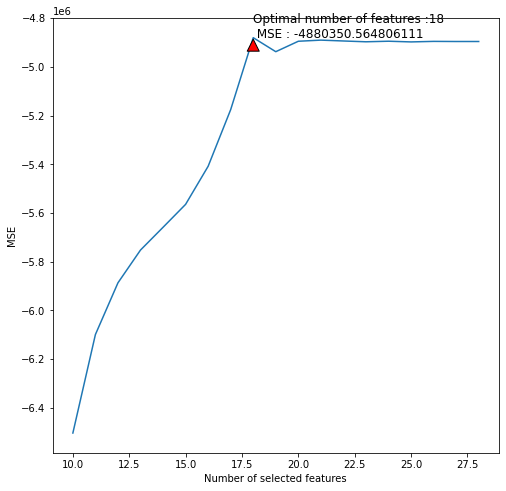

Elastic Net can explain 87.9% of the variance of the test set


In [ ]:
lr_caracteristics, lr_features = cv_rfe('Elastic Net', 
                                        ElasticNet(),
                                        X_train_scaled, 
                                        y_train, 
                                        X_test_scaled, 
                                        y_test,
                                        min_fea =10)

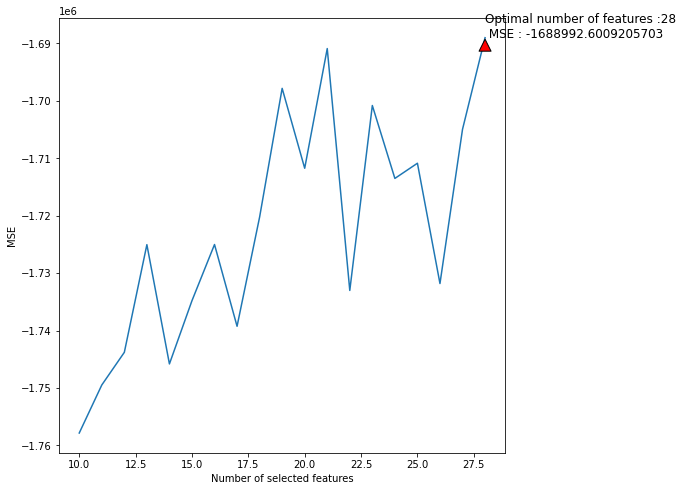

Random Forest can explain 96.7% of the variance of the test set


In [ ]:
rf_caracteristics, rf_features = cv_rfe('Random Forest', 
                                        RandomForestRegressor(),
                                        X_train_scaled, 
                                        y_train, 
                                        X_test_scaled, 
                                        y_test,
                                        min_fea =10)

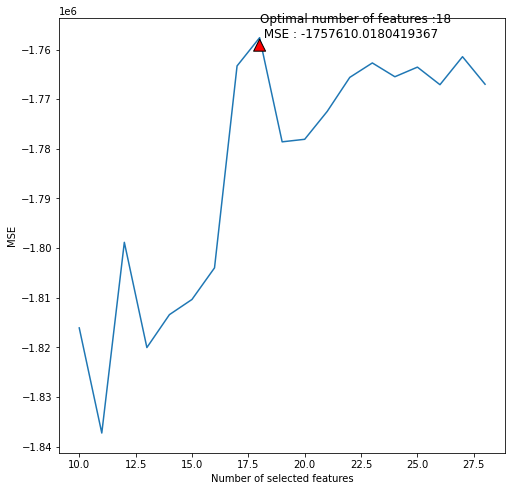

Gradient Boosting can explain 96.5% of the variance of the test set


In [ ]:
gb_caracteristics, gb_features = cv_rfe('Gradient Boosting', 
                                        GradientBoostingRegressor(),
                                        X_train_scaled, 
                                        y_train, 
                                        X_test_scaled, 
                                        y_test,
                                        min_fea =10)

The result of the feature selection process is
- 23 (out of 28) optimal features for linear regression
- 28 (out of 28) optimal features for random forest regression
- 18 (out of 28) optimal features for gradient boosting regression

- Selected features for linear regression

In [ ]:
lr_f = pd.DataFrame(lr_features, index=X_train_scaled.columns)
lr_f[lr_f['Feature']==True].index

Index(['year', 'mileage', 'mpg', 'engineSize', 'transmission_Manual',
       'fuelType_Hybrid', 'fuelType_Petrol', 'model_ Aygo', 'model_ C-HR',
       'model_ Corolla', 'model_ GT86', 'model_ Hilux', 'model_ Land Cruiser',
       'model_ PROACE VERSO', 'model_ Prius', 'model_ RAV4', 'model_ Supra',
       'model_ Yaris'],
      dtype='object')

- Selected features for random forest regression

In [ ]:
rf_f = pd.DataFrame(rf_features, index=X_train_scaled.columns)
rf_f[rf_f['Feature']==True].index

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'transmission_Manual',
       'transmission_Other', 'transmission_Semi-Auto', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol', 'model_ Avensis', 'model_ Aygo',
       'model_ C-HR', 'model_ Camry', 'model_ Corolla', 'model_ GT86',
       'model_ Hilux', 'model_ IQ', 'model_ Land Cruiser',
       'model_ PROACE VERSO', 'model_ Prius', 'model_ RAV4', 'model_ Supra',
       'model_ Urban Cruiser', 'model_ Verso', 'model_ Verso-S',
       'model_ Yaris'],
      dtype='object')

- Selected features for gradient boosting regression

In [ ]:
gb_f = pd.DataFrame(gb_features, index=X_train_scaled.columns)
gb_f[gb_f['Feature']==True].index

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Hybrid', 'fuelType_Petrol',
       'model_ Avensis', 'model_ Aygo', 'model_ C-HR', 'model_ Camry',
       'model_ Land Cruiser', 'model_ PROACE VERSO', 'model_ Prius',
       'model_ RAV4', 'model_ Supra'],
      dtype='object')

Modelling:
-

Subseting the data to get the best features for each model

In [ ]:
# linear regression features 
X_train_lr = X_train_scaled.loc[:, lr_f['Feature']==True]
X_test_lr = X_test_scaled.loc[:, lr_f['Feature']==True]

# random forest features 
X_train_rf = X_train_scaled.loc[:, rf_f['Feature']==True]
X_test_rf = X_test_scaled.loc[:, rf_f['Feature']==True]

# gradient boosting features 
X_train_gb = X_train_scaled.loc[:, gb_f['Feature']==True]
X_test_gb = X_test_scaled.loc[:, gb_f['Feature']==True]

Linear Regression:
-
We fit an elastic net model, wich allows l1 and l2 penalties for regularization. 

In [ ]:
# Linear Regression (elaastic net)
alpha_space = np.linspace(0,3,20)
l1_ratio = np.linspace(0,1,5)
param_grid = {'alpha': alpha_space,
              'l1_ratio':l1_ratio,
              'random_state':[0]}
elastic_net = ElasticNet()
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)
gm_cv.fit(X_train_lr, y_train)
y_pred_lr = gm_cv.predict(X_test_lr)
score_lr = gm_cv.score(X_test_lr, y_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Tuned ElasticNet params: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet score: {}".format(score_lr))
print("Tuned ElasticNet MSE: {}".format(mse_lr))

Tuned ElasticNet params: {'alpha': 1.263157894736842, 'l1_ratio': 1.0, 'random_state': 0}
Tuned ElasticNet score: 0.9216276965666632
Tuned ElasticNet MSE: 3216384.920925853


The best elastic net model has alpha=1.26 and l1_ratio=1, which is basically a Lasso regression.
- MSE = 3216384.92

Random Forest:
-
We try random forest regression for different n_estimators and max_depth parameters

In [ ]:
# Random Forest 
n_estimators = np.linspace(600,800, num=3)
param_grid = {'n_estimators': [int(x) for x in n_estimators],
              'max_depth': [5, 15, 20],
              'random_state': [0]}

random_forest = RandomForestRegressor()
gm_cv = GridSearchCV(random_forest, param_grid, cv=5)
gm_cv.fit(X_train_rf, y_train)
y_pred_rf = gm_cv.predict(X_test_rf)
score_rf = gm_cv.score(X_test_rf, y_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Tuned Random Forest params: {}".format(gm_cv.best_params_))
print("Tuned Random Forest score: {}".format(score_rf))
print("Tuned Random Forest MSE: {}".format(mse_rf))

Tuned Random Forest params: {'max_depth': 15, 'n_estimators': 600, 'random_state': 0}
Tuned Random Forest score: 0.9675759296895172
Tuned Random Forest MSE: 1330677.8830404503


The best ramdom forest regression model has max_depth=15 and n_estimators=600.
- MSE = 1330677.88

Gradient Boosting:
-
We fit gradient boosting regressions with different n_estimators, max_depth and learning_rate parameters.

In [ ]:
# Gradient Boosting
param_grid = { "n_estimators":[5,50,250],
               "max_depth":[1,3,5], 
               "learning_rate":[0.01,0.1,1,10]}

gradient_boosting = GradientBoostingRegressor()
gm_cv = GridSearchCV(gradient_boosting, param_grid, cv=5)
gm_cv.fit(X_train_gb, y_train)
y_pred_gb = gm_cv.predict(X_test_gb)
score_gb = gm_cv.score(X_test_gb, y_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Tuned Gradient Boosting params: {}".format(gm_cv.best_params_))
print("Tuned Gradient Boosting score: {}".format(score_gb))
print("Tuned Gradient Boosting MSE: {}".format(mse_gb))

Tuned Gradient Boosting params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}
Tuned Gradient Boosting score: 0.9722659400174116
Tuned Gradient Boosting MSE: 1138200.7216353763


The best gradient boosting regression has learning_rate=0.1, max_depth=5 and n_estimators=250.
- MSE  = 1138200.72

Alternative error rate:
-
In this error rate we are only considering the observations where the prediction was more than £1500 above the test set price.

In [ ]:
lr_error = pd.DataFrame(y_pred_lr - y_test)
rf_error = pd.DataFrame(y_pred_rf - y_test)
gb_error = pd.DataFrame(y_pred_gb - y_test)

lr_error = lr_error.rename(columns={'price':'dif'})
rf_error = rf_error.rename(columns={'price':'dif'})
gb_error = gb_error.rename(columns={'price':'dif'})


lr_error1 = lr_error[lr_error['dif']>=1500]
above_1500_lr = len(lr_error1.index)/len(lr_error.index)*100

rf_error1 = rf_error[rf_error['dif']>=1500]
above_1500_rf = len(rf_error1.index)/len(rf_error.index)*100

gb_error1 = gb_error[gb_error['dif']>=1500]
above_1500_gb = len(gb_error1.index)/len(gb_error.index)*100

print("Above 1500 lr error rate: {}".format(above_1500_lr))
print("Above 1500 rf error rate: {}".format(above_1500_rf))
print("Above 1500 gb error rate: {}".format(above_1500_gb))

Above 1500 lr error rate: 10.385756676557865
Above 1500 rf error rate: 6.478733926805143
Above 1500 gb error rate: 5.934718100890208


Conclusion:
-
Out of the three kinds of models tried in this analysis, the best one to predict car prices is a Gradient Boosting Regression with a learning rate of 0.1, max depth of 5 and 250 estimators. This model is fitted using only 18 of the 28 variables available, and has a mean squared error of 1138200.72 which is the smallest mse when we compare with the other models mse.

Aditionally, this is also the model with the smallest above_1500_error_rate, with only 5.93% of the observations above the 1500 threshold.

